# Caida de P$P (Guatemala)

## Conexión con AWS300

In [3]:
import pandas as pd
import pyodbc
import warnings
warnings.filterwarnings('ignore')

conn = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=AWNTS300;DATABASE=DATALAB;UID=usrdm;PWD=dm$2Admin4')

In [5]:
 #Falta afinar para que sea por país y por campaña
df = pd.read_sql("select * from [dbo].[CR_INPUT1_PDP]" , conn)
writer = pd.ExcelWriter('output.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [4]:
df.head()

,Pkebelista,v201711,v201712,v201713,v201715,Pedidos_ult_18camp,DecilAñoAnterior,PMNPAñoAnterior,DecilCampAnterior,PMNPCampAnterior,...,ppu201713,Q201711,Q201712,Q201713,FlagIpUnicoZona,pd201711,pd201712,pd201713,CodComportamientoRolling,FechaNacimiento
0,245726,26628.379925,28062.429781,20703.969954,55986.529604,9,NaN,NaN,4,20703.969954,...,79.325555,15,17,9,0,0,0,0,5,1973-12-03
1,247412,36262.499485,37686.600151,15762.899895,44087.399969,12,NaN,NaN,6,15762.899895,...,52.543000,17,18,10,0,0,0,0,6,1997-08-04
2,258294,12952.319824,18401.280151,15154.239990,23932.479980,12,7.0,17854.506470,7,15154.239990,...,67.652857,6,9,7,0,0,0,0,7,1964-06-14
3,258551,12660.479858,12619.199707,15199.359924,15979.199829,16,4.0,22915.108538,7,15199.359924,...,94.996000,5,2,5,0,0,0,0,6,1990-10-06
4,260409,24095.040161,18920.319946,19564.800110,13748.799805,18,5.0,21650.453089,4,19564.800110,...,76.425000,12,12,8,1,0,0,0,5,1990-02-11


In [5]:
print('La base de datos cuenta con ' + str(df.shape[0]) + ' filas y ' 
      + str(df.shape[1]) +' columnas.')

La base de datos cuenta con 15605 filas y 25 columnas.


In [6]:
#Eliminamos las filas que contengan valores NULL en campos donde no deberían tener.

df = df.dropna(axis=0, how='all', subset=['FechaNacimiento'])

In [7]:
def PromVariacion (num1, num2, num3):
    var1 = ((num2/num1)-1)
    var2 = ((num3/num2)-1)
    PromVar = (var1+var2)/2
    return PromVar*100


In [8]:
df['VarVentas3Camp'] = PromVariacion(df.v201711,df.v201712,df.v201713)
df['VarMCT3Camp'] =PromVariacion(df.mct201711,df.mct201712,df.mct201713)
df['VarPPU3Camp'] =PromVariacion(df.ppu201711,df.ppu201712,df.ppu201713)
df['VarPPU3Camp'] =PromVariacion(df.Q201711,df.Q201712,df.Q201713)
df['PD3Camp'] = df.pd201711 + df.pd201712 +df.pd201713
df['Target'] = (df.v201715/df.v201713 -1)*100


In [9]:
df1 = df.drop(['v201711', 'v201712','v201713','v201715','mct201711','mct201712','mct201713','ppu201711','ppu201712','ppu201713',
               'Q201711', 'Q201712', 'Q201713', 'pd201711', 'pd201712', 'pd201713'], axis=1)


In [10]:
pd.DataFrame(df1.dtypes, columns = ['Tipo de dato'])

,Tipo de dato
Pkebelista,int64
Pedidos_ult_18camp,int64
DecilAñoAnterior,float64
PMNPAñoAnterior,float64
DecilCampAnterior,int64
PMNPCampAnterior,float64
FlagIpUnicoZona,int64
CodComportamientoRolling,int64
FechaNacimiento,datetime64[ns]
VarVentas3Camp,float64


In [47]:
import numpy as np

df1['TargetBinary'] = np.where(df1['Target']<-10, 1, 0)

df1['TargetBinary'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

0    8748
1    6855
Name: TargetBinary, dtype: int64

In [12]:
import datetime as DT
import io

now = pd.Timestamp(DT.datetime.now())
df1['FechaNacimiento'] = df1['FechaNacimiento'].where(df1['FechaNacimiento'] < now, df1['FechaNacimiento'] -  np.timedelta64(100, 'Y'))   # 2
df1['Edad'] = (now - df1['FechaNacimiento']).astype('<m8[Y]')    # 3

df2 = df1.drop(['FechaNacimiento'], axis=1)

In [13]:
pd.DataFrame(df2.dtypes, columns = ['Tipo de dato'])

,Tipo de dato
Pkebelista,int64
Pedidos_ult_18camp,int64
DecilAñoAnterior,float64
PMNPAñoAnterior,float64
DecilCampAnterior,int64
PMNPCampAnterior,float64
FlagIpUnicoZona,int64
CodComportamientoRolling,int64
VarVentas3Camp,float64
VarMCT3Camp,float64


In [14]:
df2.describe()

,Pkebelista,Pedidos_ult_18camp,DecilAñoAnterior,PMNPAñoAnterior,DecilCampAnterior,PMNPCampAnterior,FlagIpUnicoZona,CodComportamientoRolling,VarVentas3Camp,VarMCT3Camp,VarPPU3Camp,PD3Camp,Target,TargetBinary,Edad
count,15603.000000,15603.000000,13387.000000,13387.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000,15603.000000
mean,195120.682946,15.488496,5.499290,23819.463937,5.499007,21260.351174,0.372364,5.717554,12.473000,11.007092,16.661523,0.322887,4.899779,0.439339,39.883292
std,92753.474997,3.320185,2.872284,17210.904559,2.872418,16612.486711,0.483450,0.709607,39.296849,39.505409,49.063363,0.725022,59.211744,0.496322,12.928542
min,39.000000,3.000000,1.000000,4097.813334,1.000000,820.479980,0.000000,2.000000,-74.931800,-74.166667,-77.976190,0.000000,-100.000000,0.000000,10.000000
25%,117729.000000,14.000000,3.000000,16505.036138,3.000000,13454.879974,0.000000,5.000000,-7.798563,-12.500000,-10.000000,0.000000,-27.984697,0.000000,29.000000
50%,216946.000000,17.000000,5.000000,20370.285549,5.000000,16985.279785,0.000000,6.000000,5.981126,4.166667,7.777778,0.000000,-4.523442,0.000000,38.000000
75%,278741.000000,18.000000,8.000000,26503.565616,8.000000,24402.879608,1.000000,6.000000,24.838117,25.000000,30.000000,0.000000,22.611649,1.000000,49.000000
max,312147.000000,18.000000,10.000000,703053.300494,10.000000,537233.918701,1.000000,7.000000,1820.414735,541.666667,988.095238,7.000000,1737.012518,1.000000,100.000000


# Exploración y visualización

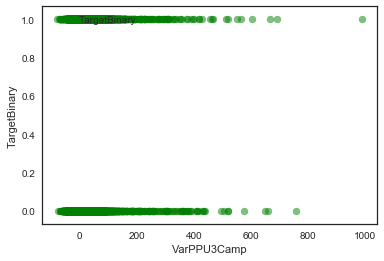

In [105]:
import matplotlib.pyplot
import matplotlib

plt.scatter(df2.VarPPU3Camp, df2.TargetBinary, c="g", alpha=0.5, marker='o')
plt.xlabel("VarPPU3Camp")
plt.ylabel("TargetBinary")
plt.legend(loc=2)
plt.show()

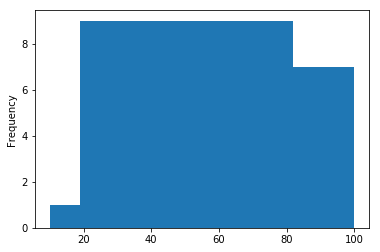

In [15]:
%matplotlib inline
count_edad = df2.groupby([u'Edad'])[u'Edad'].count().reset_index(name='count')
count_edad[u'Edad'].plot(kind='hist')

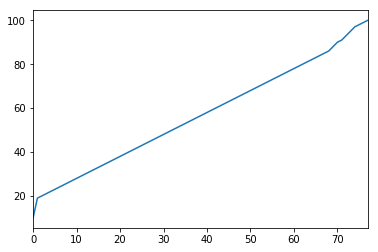

In [16]:
count_edad[u'Edad'].plot()

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
def corr_1(df):
    sns.set(style="white") 
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(10, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    return sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

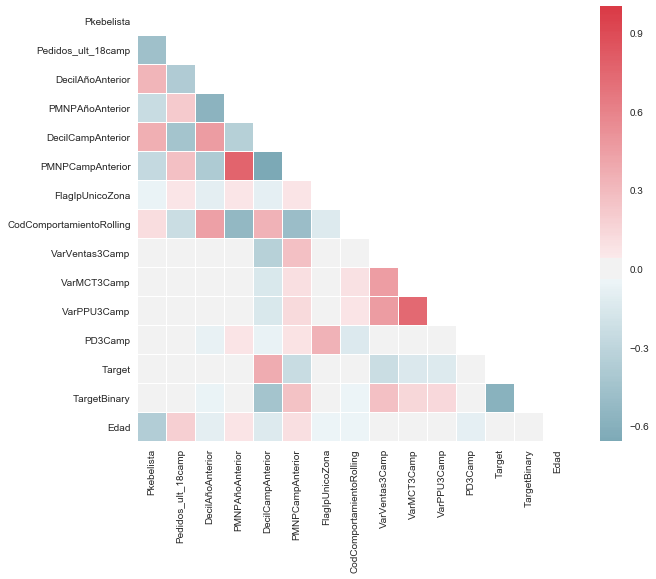

In [48]:
corr_1(df2)

## Modelo

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [111]:
df2 = df2.drop('Target', axis=1)


In [120]:
# 1. Borrando filas con NA en datos del año anterior: trabajamos solo con registros de los cuales se tiene data desde el año pasado.
df21 = df2.dropna(axis=0, how='all', subset=['DecilAñoAnterior', 'PMNPAñoAnterior'])
print(df21.shape)
print(df21.isnull().values.any())


X_train, X_test, y_train, y_test = train_test_split(
df21.loc[:, df21.columns != 'TargetBinary'],
 df21[u'TargetBinary'].values, 
 test_size=0.15, 
 random_state=42)


niveles_arbol = 3
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = niveles_arbol)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))


scores = cross_val_score(clf, df21.loc[:, df21.columns != 'TargetBinary'],df21[u'TargetBinary'].values,  cv=6)
print('Cross-validated scores: ', scores)

(13387, 14)
False
             precision    recall  f1-score   support

          0       0.79      0.66      0.72      1163
          1       0.62      0.76      0.68       846

avg / total       0.72      0.70      0.71      2009

Cross-validated scores:  [ 0.7311828   0.70833333  0.71908602  0.71268489  0.71076233  0.73049327]


In [124]:
# 2. Borrando por completo las columnas  que tengan valores NA.
df22 = df2.drop(['DecilAñoAnterior', 'PMNPAñoAnterior' ], axis=1)
print(df22.shape)
df22.isnull().values.any()

X_train, X_test, y_train, y_test = train_test_split(
df22.loc[:, df22.columns != 'TargetBinary'],
 df22[u'TargetBinary'].values, 
 test_size=0.15, 
 random_state=42)


q_niveles_arbol = 10
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = q_niveles_arbol)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

(15603, 12)
             precision    recall  f1-score   support

          0       0.73      0.75      0.74      1297
          1       0.68      0.66      0.67      1044

avg / total       0.71      0.71      0.71      2341



In [134]:
# 3. Usando IMPUTER de scikit learn: reemplazando los NaN con la media

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df2)

prep = imp.transform(df2) 
df23 = pd.DataFrame(prep, columns = df2.columns)

X_train, X_test, y_train, y_test = train_test_split(
df23.loc[:, df23.columns != 'TargetBinary'],
 df23[u'TargetBinary'].values, 
 test_size=0.15, 
 random_state=42)


q_niveles_arbol = 5
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = q_niveles_arbol)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

        0.0       0.76      0.77      0.76      1297
        1.0       0.71      0.70      0.71      1044

avg / total       0.74      0.74      0.74      2341



Ajustes al modelo:
- No eliminar las columnas con data del año pasado sino procesarlas (reemplazar con decil 0?, reemplazar con la media?)
- trabajr solo con las filas de las cuales se tiene info del año pasado?



In [86]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred) 

In [87]:
from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()


In [88]:
labels = ['Sí Cae', 'Sube o Mantiene']
print_cm(cnf_matrix, labels)

                             Sí Cae Sube o Mantiene 
             Sí Cae          1463.0             0.0 
    Sube o Mantiene             0.0          1215.0 


In [89]:

y_pred2 = np.ones(len(y_pred))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))